In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [2]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

In [3]:
len(train_dataset)

60000

In [4]:
#train_dataset[0]

In [5]:
type(train_dataset[0])

tuple

In [6]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [7]:
train_dataset[0][1]

5

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [9]:
train_dataset[0][0].shape # i want to convert torch to numpy to plot 

torch.Size([1, 28, 28])

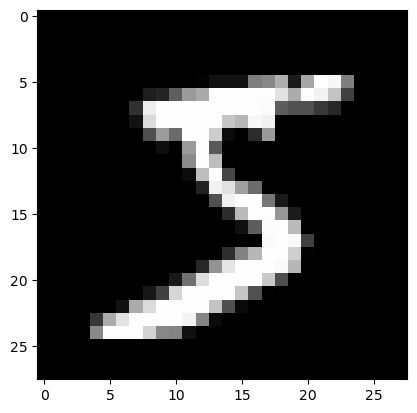

In [10]:
show_img = train_dataset[0][0].numpy().squeeze()
plt.imshow(show_img,cmap='gray')

In [11]:
# Label
train_dataset[0][1]

5

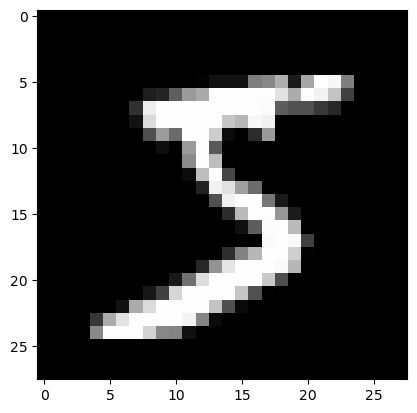

In [12]:
#show_img = train_dataset[1][0].numpy().squeeze()
plt.imshow(show_img,cmap='gray')

In [13]:
train_dataset[1][1]

0

In [14]:
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [15]:
len(test_dataset)

10000

In [16]:
type(test_dataset[0])

tuple

In [17]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

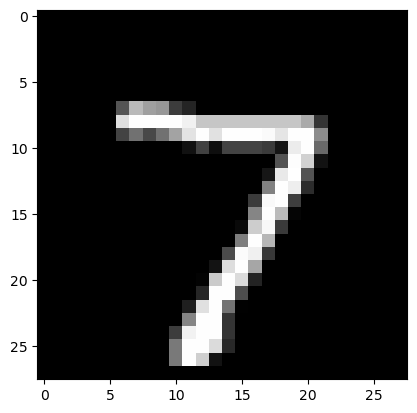

In [18]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [19]:
test_dataset[0][1]

7

In [20]:
len(train_dataset)

60000

In [21]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [22]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [23]:
import collections.abc as collections
isinstance(train_loader, collections.Iterable)

True

In [24]:
# Iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [25]:
isinstance(test_loader, collections.Iterable)

True

In [26]:
class logoisticregression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out

In [27]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [28]:
input_dim = 28*28
output_dim = 10

model = logoisticregression(input_dim, output_dim)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [30]:
# Type of parameter object
print(model.parameters())

# Length of parameters
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x0000024CDC8E3140>
2
torch.Size([10, 784])
torch.Size([10])


In [31]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.9554830193519592. Accuracy: 84.31999969482422
Iteration: 1000. Loss: 0.6212002038955688. Accuracy: 87.23999786376953
Iteration: 1500. Loss: 0.45348060131073. Accuracy: 87.93000030517578
Iteration: 2000. Loss: 0.43390610814094543. Accuracy: 88.48999786376953
Iteration: 2500. Loss: 0.4842524826526642. Accuracy: 88.91999816894531
Iteration: 3000. Loss: 0.43422549962997437. Accuracy: 89.2699966430664
